# Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,accuracy_score,precision_score,recall_score,f1_score,classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

# Loading the dataset

In [2]:
df = pd.read_csv('C:\\Users\\nhars\\Downloads\\BankChurners.csv\\BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Overview and the statistical summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
# checking the shape of the dataset
df.shape

(10127, 23)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,NaN,NaN,NaN,739177606.333663,36903783.450231,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0


# Data cleaning

In [6]:
# removing impertinent columns
df = df.iloc[:,1:-2]
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
#checking for null values
df.isna().sum().sort_values(ascending=False)

Attrition_Flag              0
Customer_Age                0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Months_Inactive_12_mon      0
Total_Relationship_Count    0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Avg_Utilization_Ratio       0
dtype: int64

There are no null values in the dataset.

### Dealing with the outliers

As there are only 10000 observations, instead of removing outliers, I will be replacing the extreme high values with the upper limit values.

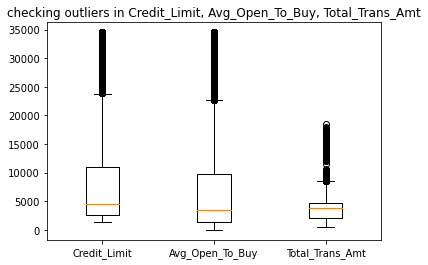

In [8]:
plt.boxplot(df[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']],labels=['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt'])
plt.title('checking outliers in Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt');

In [9]:
#creating a helper function to replace higher values
def optimise_higher_values(n):
    if n>=upper_limit:
        return upper_limit
    return n

In [10]:
#looping through the cols to optimise values
cols = ['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']

for i in cols:
    perc_25 = df[i].quantile(.25)
    perc_75 = df[i].quantile(.75)

    iqr = perc_75 - perc_25

    upper_limit = perc_75 + 1.5 * iqr
    df[i]=df[i].apply(optimise_higher_values)
    

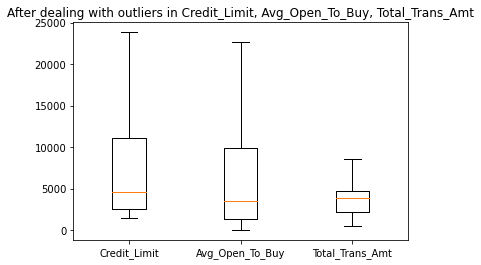

In [11]:
plt.boxplot(df[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']],labels=['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt'])
plt.title('After dealing with outliers in Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt');

In [12]:
# checking stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,7882.309381,7217.091225,1438.3,2555.000,4549.000,11067.500,23836.250
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,6720.676247,7223.542192,3.0,1324.500,3474.000,9859.000,22660.750
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


# EDA

In [13]:
#checking for class imbalance
df['Attrition_Flag'].value_counts(normalize=True)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

There is only 16% of churned customer data, there is clearly class imbalance with Existing customer being the major element.

In [16]:
# mapping the target column data to 0 and 1 binary values
df['Attrition_Flag']=df['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

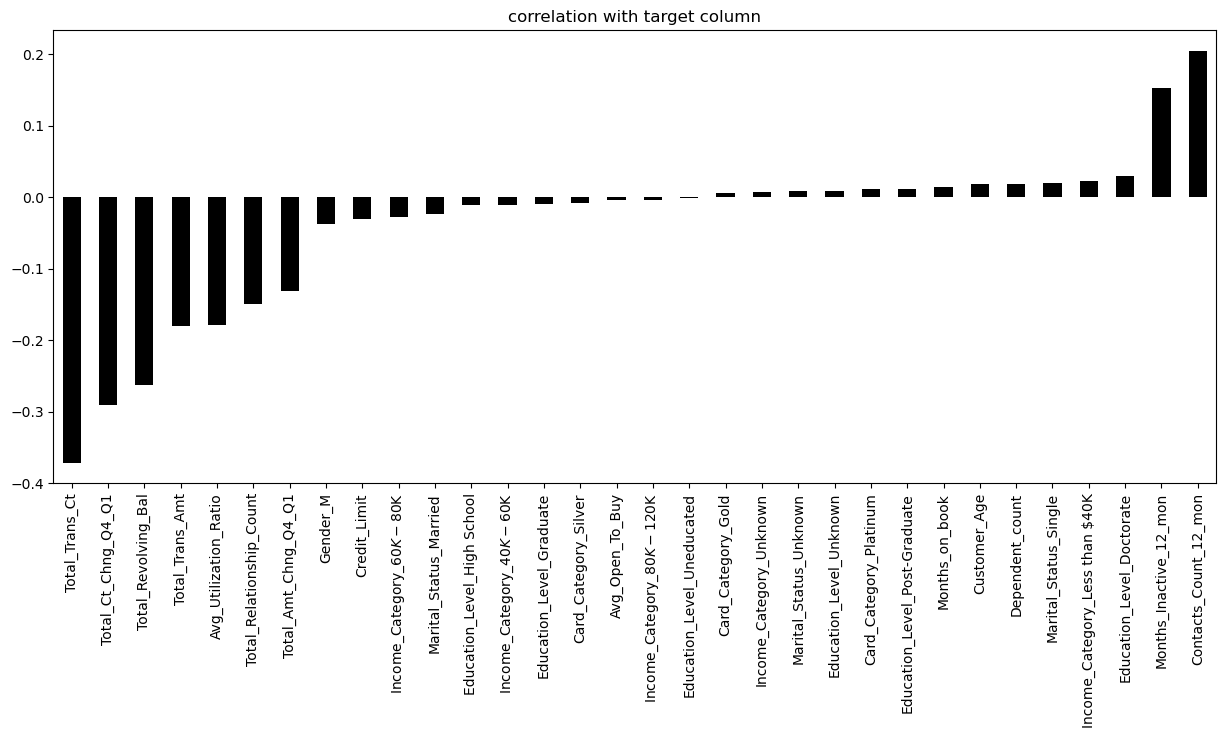

In [22]:
# checking correlation with target column
plt.figure(figsize=(15,6),dpi=100)
pd.get_dummies(df,drop_first=True).corr()['Attrition_Flag'].sort_values()[:-1].plot(kind='bar',color = 'black')
plt.title('correlation with target column');

Contacts_Count_12_mon, Months_Inactive_12_mon are highly positively correlated whereas Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 are highly negatively correlated.

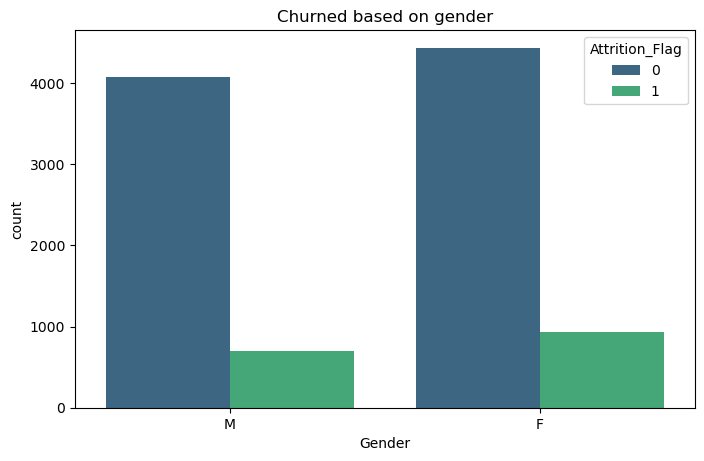

In [30]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(data=df,x='Gender',hue='Attrition_Flag',palette='viridis')
plt.title('Churned based on gender');

Female customers have churned more than male customers.

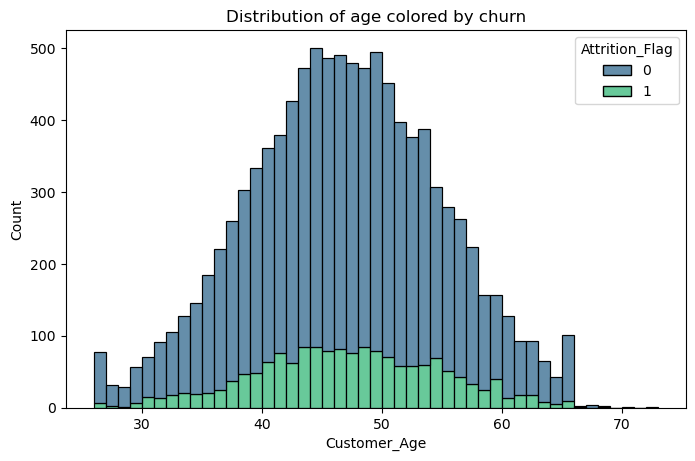

In [33]:
plt.figure(figsize=(8,5),dpi=100)
sns.histplot(data=df,x='Customer_Age',hue='Attrition_Flag',multiple='stack',palette='viridis')
plt.title('Distribution of age colored by churn');

Customers who are aged between 40 and 50 have churned more when compared to other ages.

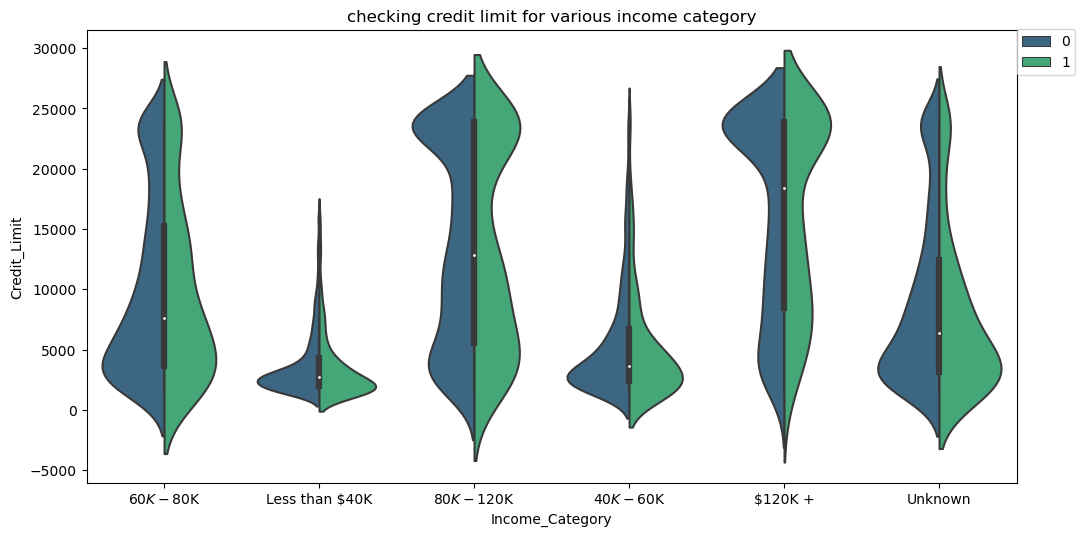

In [39]:
# plotting violin plot
plt.figure(figsize=(12,6),dpi=100)
sns.violinplot(data=df,x='Income_Category',y='Credit_Limit',hue='Attrition_Flag',split=True,palette='viridis')
plt.title('checking credit limit for various income category')
plt.legend(loc=(1,.9))

Most of the income categories have the higher distribution of churned customers having 5000 or less credit limit.

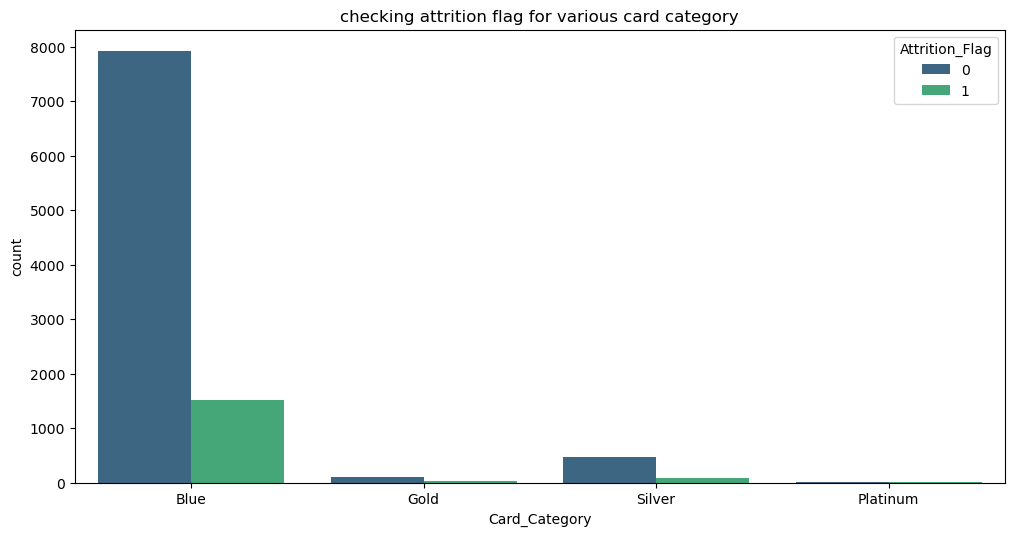

In [41]:
#plotting count plot for various card category
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=df,x='Card_Category',hue='Attrition_Flag',palette='viridis')
plt.title('checking attrition flag for various card category');

Highest churned customers fall under the blue card category.

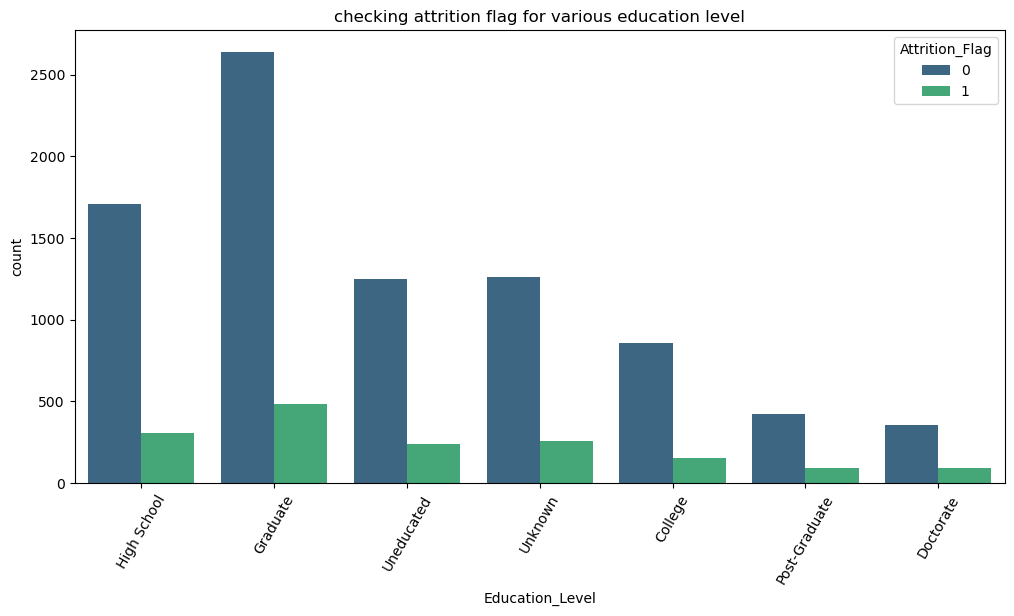

In [44]:
#plotting count plot for various card category
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=df,x='Education_Level',hue='Attrition_Flag',palette='viridis')
plt.xticks(rotation = 60)
plt.title('checking attrition flag for various education level');

Top two highest churned customers are from Graduate and High School category.

# Feature Engineering

In [45]:
# converting categorical variables to dummy variables
df = pd.get_dummies(df,drop_first=True)
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,1,0,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,0,0,0,0


# Creating X,y and doing train - test split

In [46]:
X = df.drop('Attrition_Flag',axis=1)
y = df['Attrition_Flag']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Scaling the data using standard scaler

In [50]:
# instantiating standard scaler
scale = StandardScaler()

In [51]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Model building

Choosing xgb classifier

In [52]:
xgb_model = XGBClassifier(objective='binary:logistic')

In [54]:
# selecting hyperparameters for grid search CV
params = {'n_estimators':[90,110,120],'max_depth':[4,6,9,11],'learning_rate':[.3,.6,.8],'min_child_weight':[3,5,8],'subsample':[.75]}

In [55]:
# selecting scoring metrics
scoring = ['accuracy','precision','recall','f1']

In [56]:
#instantiating grid search CV and refitting model to recall
grid_model_xgb = GridSearchCV(xgb_model,param_grid=params,cv=5,scoring=scoring,refit='recall')

In [59]:
%%time
grid_model_xgb.fit(X_train_scaled,y_train)

Wall time: 2min 23s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [60]:
# best score
grid_model_xgb.best_score_

0.8923665169232878

In [61]:
grid_model_xgb.best_params_

{'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 90,
 'subsample': 0.75}

In [62]:
# final_model based on best parameters
xgb_model_final = XGBClassifier(objective='binary:logistic',learning_rate = 0.3,max_depth = 4,min_child_weight = 3,n_estimators = 90, subsample = 0.75)

In [63]:
#fitting the model to trained data
xgb_model_final.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
y_pred = xgb_model_final.predict(X_test_scaled)

# Evaluating the model

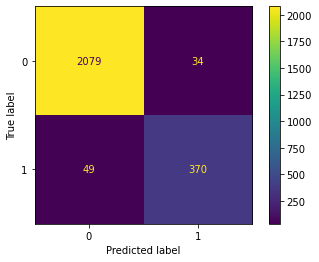

In [65]:
#plot confusion matrix
plot_confusion_matrix(grid_model_xgb,X_test_scaled,y_test)

Only 34 false positives and 49 false negatives

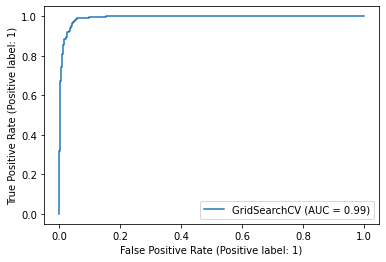

In [66]:
plot_roc_curve(grid_model_xgb,X_test_scaled,y_test)

AUC is .99 which is good score

In [67]:
Scores = {'Accuracy':accuracy_score(y_test,y_pred),'F1_score':f1_score(y_test,y_pred),'Recall':recall_score(y_test,y_pred),'Precision':precision_score(y_test,y_pred)}
Scores

{'Accuracy': 0.967219589257504,
 'F1_score': 0.8991494532199271,
 'Recall': 0.883054892601432,
 'Precision': 0.9158415841584159}

# Summary

## Model has performed well with XGB classifier with below scores
* **Accuracy is .96**
* **Precision is .91**
* **Recall is .88**
* **F1_score is .89**

**Thank you!**